In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp

# Basic
## Optimisation

In [2]:
from scipy.optimize import minimize

Minimise $f(x) = (x-3)^2$

In [3]:
def f(x):
    return (x-3)**2

res = minimize(f, 2)

In [4]:
res

  message: Optimization terminated successfully.
  success: True
   status: 0
      fun: 5.551437397369767e-17
        x: [ 3.000e+00]
      nit: 2
      jac: [-4.325e-13]
 hess_inv: [[ 5.000e-01]]
     nfev: 6
     njev: 3

In [5]:
res.x

array([2.99999999])

Minimise $f(x,y) = (x-1)^2 + (y-2.5)^2$ subject to
$$
x-2y+2 \geq 0 \\
-x-2y+6 \geq 0 \\
-x+2y+2 \geq 0 \\
x \geq 0 \\
y \geq 0
$$

- 2D function takes in vector $x$
- Constraints must be spcified as $g_i(x) \geq 0 $
- Bounds specified as rectangular

In [9]:
f = lambda x: (x[0] - 1)**2 + (x[1] - 2.5)**2
cons = ({'type': 'ineq', 'fun': lambda x: x[0] - 2 * x[1] + 2},
        {'type': 'ineq', 'fun': lambda x: -x[0] - 2 * x[1] + 6},
        {'type': 'ineq', 'fun': lambda x: -x[0] + 2 * x[1] + 2}) # constraints (inequalities), a tuple of dictionaries
bnds = ((0, None), (0, None)) # bounds (lower and upper), a tuple of tuples
res = minimize(f, (2, 0), bounds=bnds, constraints=cons)

In [19]:
res

 message: Optimization terminated successfully
 success: True
  status: 0
     fun: 0.8000000011920985
       x: [ 1.400e+00  1.700e+00]
     nit: 3
     jac: [ 8.000e-01 -1.600e+00]
    nfev: 10
    njev: 3

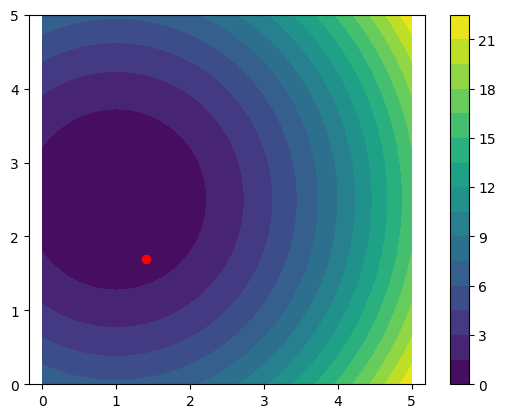

In [41]:
x = np.linspace(0, 5, 500)
y = np.linspace(0, 5, 500)
xv, yv = np.meshgrid(x, y)
zv = f([xv, yv])
plt.contourf(xv, yv, zv, 20)
plt.axis('equal')
plt.colorbar()
plt.plot(res.x[0], res.x[1], 'ro')


In [37]:
# minimize?

## Interpolation
Suppose you have the following data

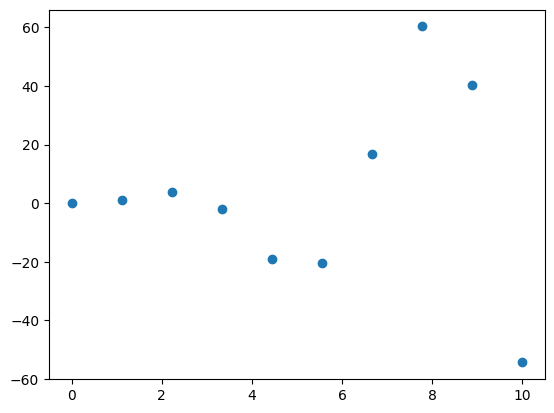

In [2]:
x = np.linspace(0, 10, 10)
y = x**2 * np.sin(x)
plt.scatter(x,y)

You want to know the values in between

In [3]:
from scipy.interpolate import interp1d

In [7]:
f = interp1d(x, y, kind='cubic')
x_dense = np.linspace(0, 10, 100)
y_dense = f(x_dense)

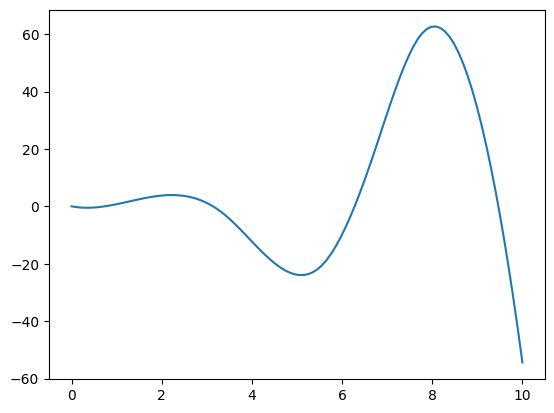

In [8]:
plt.plot(x_dense, y_dense)

# Curve Fitting
Trivial Example

In [4]:
x_data = np.linspace(0, 10, 10)
y_data = 3*x_data**2 + 2

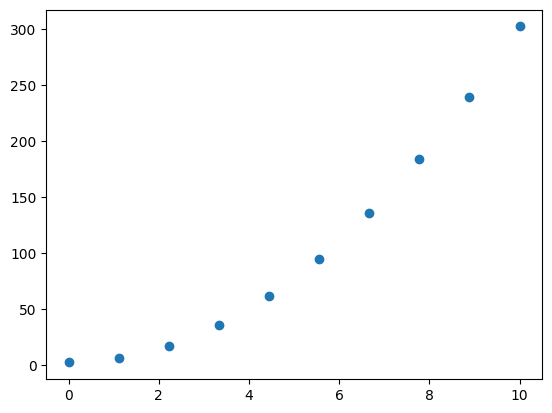

In [5]:
plt.scatter(x_data, y_data)

Want to fit the data to the curve $y = ax^2 + b$. The main goal here is to determine the values of $a$ and $b$

In [6]:
from scipy.optimize import curve_fit # curve fitting

def func(x, a, b):
    return a*x**2 + b  # function to fit

popt, pcov = curve_fit(func, x_data, y_data, p0=(1, 1)) # p0 is the initial guess for the parametersccoscoscl;co



In [8]:
popt

array([3., 2.])

The equation for spring motion is $y(t) = A\cos(\omega t+\phi)$. Want to find the natural frequency of oscillation $\omega$ for the spring. You collect the data

In [9]:
t_data = np.array([ 0.   ,  0.34482759,  0.68965517,  1.03448276,  1.37931034,
        1.72413793,  2.06896552,  2.4137931 ,  2.75862069,  3.10344828,
        3.44827586,  3.79310345,  4.13793103,  4.48275862,  4.82758621,
        5.17241379,  5.51724138,  5.86206897,  6.20689655,  6.55172414,
        6.89655172,  7.24137931,  7.5862069 ,  7.93103448,  8.27586207,
        8.62068966,  8.96551724,  9.31034483,  9.65517241, 10.        ])
y_data = np.array([ 4.3303953 ,  1.61137995, -2.15418696, -3.90137249, -1.67259042,
        2.16884383,  3.86635998,  1.85194506, -1.8489224 , -3.96560495,
       -2.13385255,  1.59425817,  4.06145238,  1.89300594, -1.76870297,
       -4.26791226, -2.46874133,  1.37019912,  4.24945607,  2.27038039,
       -1.50299303, -3.46774049, -2.50845488,  1.20022052,  3.81633703,
        2.91511556, -1.24569189, -3.72716214, -2.54549857,  0.87262548])

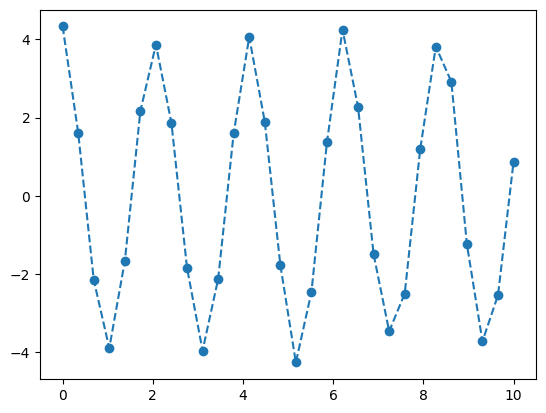

In [10]:
plt.plot(t_data, y_data, 'o--')

$\omega = 2 \pi\ f$, $f = 1/T$, and $T \approx$ seconds. Thus good initial guess is
- $\omega = 2 \pi (1/2) = \pi$
- $A = 4$
- $\phi = 0$

In [46]:
def func(t, A, w, phi):
    return A * np.cos(w*t + phi)

popt, pcov = curve_fit(func, t_data, y_data, p0=(4, np.pi, 0))

In [47]:
A, w, phi = popt

In [50]:
t = np.linspace(0, 10, 100)
y = func(t, A, w, phi)

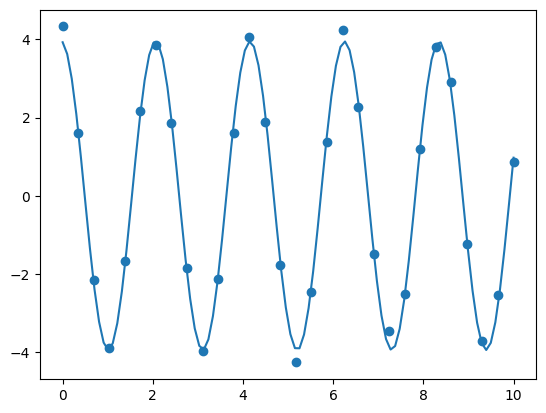

In [51]:
plt.scatter(t_data, y_data)
plt.plot(t, y) # the fitted curve

The parameters

In [52]:
popt

array([3.94836219, 2.9989952 , 0.10411352])

The estimated error on the parameters

In [53]:
np.sqrt(np.diag(pcov))

array([0.05117448, 0.00430857, 0.02575702])

# Calculus
## Differentiation

In [2]:
from scipy.misc import derivative

In [8]:
def f(x):
    return x**2 * np.sin(2*x) * np.exp(-x)
x = np.linspace(0, 1, 100)

/tmp/ipykernel_3834/2080230970.py:2: DeprecationWarning: scipy.misc.derivative is deprecated in SciPy v1.10.0; and will be completely removed in SciPy v1.12.0. You may consider using findiff: https://github.com/maroba/findiff or numdifftools: https://github.com/pbrod/numdifftools
  plt.plot(x, derivative(f, x, dx=1e-6))
/tmp/ipykernel_3834/2080230970.py:3: DeprecationWarning: scipy.misc.derivative is deprecated in SciPy v1.10.0; and will be completely removed in SciPy v1.12.0. You may consider using findiff: https://github.com/maroba/findiff or numdifftools: https://github.com/pbrod/numdifftools
  plt.plot(x, derivative(f, x, dx=1e-6, n=2))


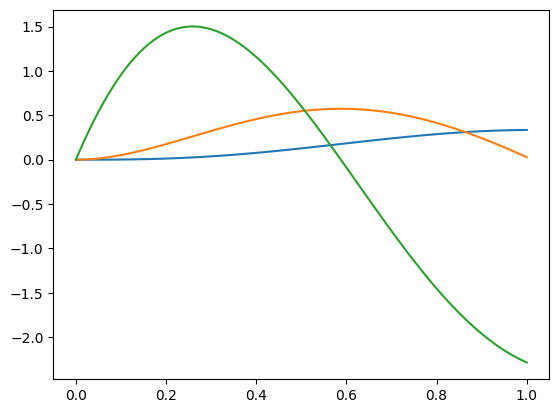

In [13]:
plt.plot(x, f(x))
plt.plot(x, derivative(f, x, dx=1e-6))
plt.plot(x, derivative(f, x, dx=1e-6, n=2))

## Integration
Simple integrals
$$\int_0^1 x^2 \sin(2x) e^{-x} dx$$

In [3]:
from scipy.integrate import quad
integrand = lambda x: x**2 * np.sin(2*x) * np.exp(-x)
integral, integral_error = quad(integrand, 0, 1)

In [5]:
integral_error

1.6162822047366225e-15

Double integrals
$$ \int_0^1 \int_{-x}^{x^2} \sin(x + y^2) dy dx $$

In [9]:
from scipy.integrate import dblquad
integrand = lambda x, y: np.sin(x + y**2)
lwr_y = lambda x: -x
upr_y = lambda x: x**2
integral, integral_error = dblquad(integrand, 0, 1, lwr_y, upr_y)

In [13]:
integral

0.315802507240474

# Differential equations
## First order ODEs
Air friction while falling

$$ v' - \alpha v^2 + \beta = 0 \hspace{1cm} v(0) = 0$$

In [5]:
from scipy.integrate import odeint

All information about differential equation

In [17]:
def dvdt(v, t):
    return 3*v**2 - 5 # setting alpha = 3 and beta = 5
v0 = 0 # initial condition


Solve the differential equation

In [18]:
t = np.linspace(0, 1, 100) # time grid
sol = odeint(dvdt, v0, t)

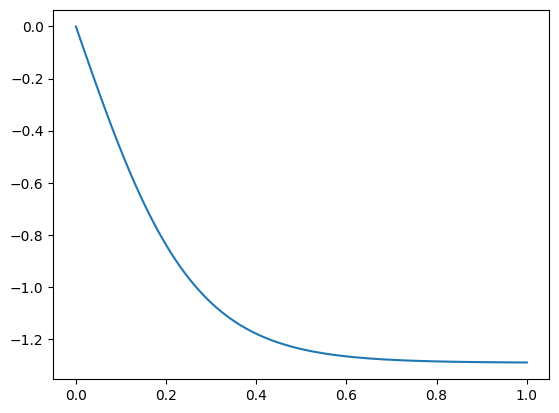

In [22]:
plt.plot(t, sol.T[0]) # transpose and take the first element

In [ ]:
plt.plot(t)

**Coupled first order ODEs**

$$ y'_1 = y_1 + y_2^2 + 3x \hspace{1cm} y_1(0) = 0$$
$$ y'_2 = 3y_1 + y_2^3 - \cos(x) \hspace{1cm} y_2(0) = 0$$

Letting $S = (y_1, y_2)$ we need to write a function that returns $dS/dx = (dy_1/dx, dy_2/dx)$. The function $dS/dx$ can take in $S = (y_1, y_2)$ and $x$.

In [27]:
def dSdx(S, x):
    y1, y2 = S
    return [y1 + y2**2 + 3*x,
            3*y1 + y2**3 - np.cos(x)]
y1_0 = 0
y2_0 = 0
S_0 = (y1_0, y2_0)

In [28]:
x = np.linspace(0, 1, 100)
sol = odeint(dSdx, S_0, x)

In [31]:
y1 = sol.T[0]
y2 = sol.T[1]

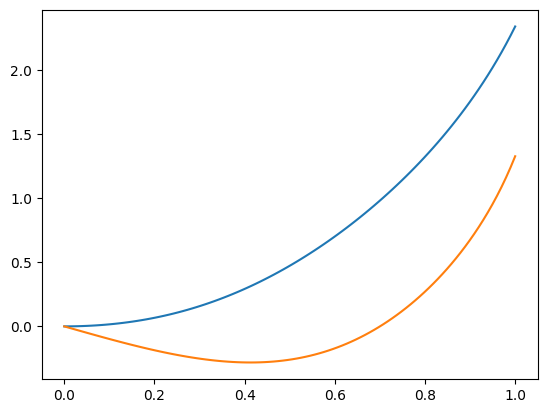

In [32]:
plt.plot(x, y1)
plt.plot(x, y2)

**Second Order ODEs**

Equation for a pendulum
$$\theta'' - \sin(\theta) = 0$$

Scipy can only solve coupled first order ODEs, but **any second order ODE can be turned into to coupled first oder ODE**s. The same thing goes for higher order ODEs.

Define $\omega  = d\theta/dt$ so that one has the following coupled ODEs

$$d\omega/dt = \sin(\theta)$$
$$d\theta/dt = \omega$$

Let $S = (\theta, \omega)$

In [33]:
def dSdt(S, t):
    theta, omega = S
    return [omega,
            np.sin(theta)]

theta0 = np.pi/4
omega0 = 0
S0 = (theta0, omega0)

In [34]:
t = np.linspace(0, 20, 100)
sol = odeint(dSdt, S0, t)
theta, omega = sol.T

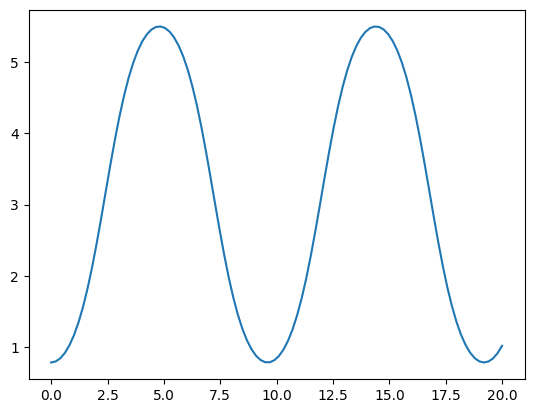

In [35]:
plt.plot(t, theta)
plt.show()